# Testing REST API with for Robot Framework

RESTinstance library makes it easy to test and interact with JSON REST API web services.

## Settings

Let's start learning it by importing the library and configuring it to test our example service: a Plone CMS demo site hosted at http://plonedemo.kitconcept.com:

In [1]:
*** Settings ***

Library  REST  https://plonedemo.kitconcept.com

Because Plone requires explicit ``Accept: application/json`` header to route reuqest to its REST API, we define user keyword **Set default headers** as **Suite Setup** to set that header for REST library calls:

In [2]:
*** Settings ***

Library  BuiltIn

Suite Setup  Set default headers

*** Keywords ***

Set default headers
    ${headers}=  Create dictionary
    ...  Accept=application/json
    Set headers  ${headers}

Now we are ready to start calling the REST library by:
* executing a HTTP verb to some absolute path with optional payload
* making test assertions on the response
* logging or returning output from the response

## GET

This first test should PASS, because English language path should return ``en`` as its language:

In [3]:
*** Test Cases ***

GET English portal root
    GET  /en
    String  response body language  en
    Output  response body language

<a href="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4xIChQeXRob24gMy42Ljggb24gbGludXgpIiBuYW1lPSJHZW5lcmF0b3IiPgo8bGluayByZWw9Imljb24iIHR5cGU9ImltYWdlL3gtaWNvbiIgaHJlZj0iZGF0YTppbWFnZS94LWljb247YmFzZTY0LEFBQUJBQUVBRUJBQUFBRUFJQUJvQkFBQUZnQUFBQ2dBQUFBUUFBQUFJQUFBQUFFQUlBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFLY0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQXFBQUFBQUFBQUFBQUFBQUFBQUFBQUxJQUFBRC9BQUFBNEFBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUEzQUFBQU53QUFBRGNBQUFBNEFBQUFQOEFBQUN4QUFBQUFBQUFBS1lBQUFEL0FBQUF1d0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQy9BQUFBL3dBQUFLa0FBQUQ2QUFBQXpBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU44QUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFnQUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBYXdBQUFHc0FBQUJyQUFBQURBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFJc0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFORUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBQUFBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBeUFBQUFNZ0FBQURJQUFBQUZBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBRHdBQUFCOEFBQUFBQUFBQUdBQUFBQmNBQUFBQUFBQUFIOEFBQUJLQUFBQUFBQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDZBQUFBd3dBQUFBQUFBQURDQUFBQS93QUFBQ2tBQUFEcUFBQUE0UUFBQUFBQUFBRDdBQUFBL3dBQUFMQUFBQUFHQUFBQUFBQUFBTm9BQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBSXdBQUFQNEFBQUQvQUFBQS93QUFBR0FBQUFBQUFBQUFBQUFBQU1rQUFBRC9BQUFBaWdBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUFBQUFBQUlBQUFBY0FBQUFCa0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFFZ0FBQUFBQUFBQUFBQUFBMmdBQUFQOEFBQUQ3QUFBQXl3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU40QUFBRC9BQUFBcXdBQUFQOEFBQUN2QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUFzZ0FBQUFBQUFBQzVBQUFBL3dBQUFNb0FBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1BQUFBREFBQUFBd0FBQUFNa0FBQUQvQUFBQXZBQUFBQUFBQUFBQUFBQUFBQUFBQUt3QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBclFBQUFBQUFBQUFBd0FNQUFJQUJBQUFmK0FBQVAvd0FBRC84QUFBZ0JBQUFQL3dBQUQvOEFBQS8vQUFBSkl3QUFESEVBQUEvL0FBQVAvd0FBQi80QUFDQUFRQUF3QU1BQUE9PSI+CjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+Ci8qIEdlbmVyaWMgYW5kIG1pc2Mgc3R5bGVzICovCmJvZHkgewogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsKICAgIGZvbnQtc2l6ZTogMC44ZW07CiAgICBjb2xvcjogYmxhY2s7CiAgICBwYWRkaW5nOiA2cHg7CiAgICBiYWNrZ3JvdW5kOiB3aGl0ZTsKfQp0YWJsZSB7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwogICAgd29yZC13cmFwOiBicmVhay13b3JkOwogICAgZW1wdHktY2VsbHM6IHNob3c7CiAgICBmb250LXNpemU6IDFlbTsKfQp0aCwgdGQgewogICAgdmVydGljYWwtYWxpZ246IHRvcDsKfQpiciB7CiAgICBtc28tZGF0YS1wbGFjZW1lbnQ6IHNhbWUtY2VsbDsgLyogbWFpbnRhaW4gbGluZSBicmVha3MgaW4gRXhjZWwgKi8KfQpociB7CiAgICBiYWNrZ3JvdW5kOiAjY2NjOwogICAgaGVpZ2h0OiAxcHg7CiAgICBib3JkZXI6IDA7Cn0KYSwgYTpsaW5rLCBhOnZpc2l0ZWQgewogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOwogICAgY29sb3I6ICMxNWM7Cn0KYSA+IGltZyB7CiAgICBib3JkZXI6IDFweCBzb2xpZCAjMTVjICFpbXBvcnRhbnQ7Cn0KYTpob3ZlciwgYTphY3RpdmUgewogICAgdGV4dC1kZWNvcmF0aW9uOiB1bmRlcmxpbmU7CiAgICBjb2xvcjogIzYxYzsKfQoucGFyZW50LW5hbWUgewogICAgZm9udC1zaXplOiAwLjdlbTsKICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOwp9Ci5tZXNzYWdlIHsKICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsKfQovKiBIZWFkZXJzICovCiNoZWFkZXIgewogICAgd2lkdGg6IDY1ZW07CiAgICBoZWlnaHQ6IDNlbTsKICAgIG1hcmdpbjogNnB4IDA7Cn0KaDEgewogICAgZmxvYXQ6IGxlZnQ7CiAgICBtYXJnaW46IDAgMCAwLjVlbSAwOwogICAgd2lkdGg6IDc1JTsKfQpoMiB7CiAgICBjbGVhcjogbGVmdDsKfQojZ2VuZXJhdGVkIHsKICAgIGZsb2F0OiByaWdodDsKICAgIHRleHQtYWxpZ246IHJpZ2h0OwogICAgZm9udC1zaXplOiAwLjllbTsKICAgIHdoaXRlLXN

"en"

This second test should FAIL, because German language path should return ``de`` as its language, not ``en``:

In [ ]:
*** Test Cases ***

GET portal root
    GET  /de
    String  response body language  en

<a href="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4xIChQeXRob24gMy42Ljggb24gbGludXgpIiBuYW1lPSJHZW5lcmF0b3IiPgo8bGluayByZWw9Imljb24iIHR5cGU9ImltYWdlL3gtaWNvbiIgaHJlZj0iZGF0YTppbWFnZS94LWljb247YmFzZTY0LEFBQUJBQUVBRUJBQUFBRUFJQUJvQkFBQUZnQUFBQ2dBQUFBUUFBQUFJQUFBQUFFQUlBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFLY0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQXFBQUFBQUFBQUFBQUFBQUFBQUFBQUxJQUFBRC9BQUFBNEFBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUEzQUFBQU53QUFBRGNBQUFBNEFBQUFQOEFBQUN4QUFBQUFBQUFBS1lBQUFEL0FBQUF1d0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQy9BQUFBL3dBQUFLa0FBQUQ2QUFBQXpBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU44QUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFnQUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBYXdBQUFHc0FBQUJyQUFBQURBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFJc0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFORUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBQUFBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBeUFBQUFNZ0FBQURJQUFBQUZBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBRHdBQUFCOEFBQUFBQUFBQUdBQUFBQmNBQUFBQUFBQUFIOEFBQUJLQUFBQUFBQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDZBQUFBd3dBQUFBQUFBQURDQUFBQS93QUFBQ2tBQUFEcUFBQUE0UUFBQUFBQUFBRDdBQUFBL3dBQUFMQUFBQUFHQUFBQUFBQUFBTm9BQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBSXdBQUFQNEFBQUQvQUFBQS93QUFBR0FBQUFBQUFBQUFBQUFBQU1rQUFBRC9BQUFBaWdBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUFBQUFBQUlBQUFBY0FBQUFCa0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFFZ0FBQUFBQUFBQUFBQUFBMmdBQUFQOEFBQUQ3QUFBQXl3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU40QUFBRC9BQUFBcXdBQUFQOEFBQUN2QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUFzZ0FBQUFBQUFBQzVBQUFBL3dBQUFNb0FBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1BQUFBREFBQUFBd0FBQUFNa0FBQUQvQUFBQXZBQUFBQUFBQUFBQUFBQUFBQUFBQUt3QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBclFBQUFBQUFBQUFBd0FNQUFJQUJBQUFmK0FBQVAvd0FBRC84QUFBZ0JBQUFQL3dBQUQvOEFBQS8vQUFBSkl3QUFESEVBQUEvL0FBQVAvd0FBQi80QUFDQUFRQUF3QU1BQUE9PSI+CjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+Ci8qIEdlbmVyaWMgYW5kIG1pc2Mgc3R5bGVzICovCmJvZHkgewogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsKICAgIGZvbnQtc2l6ZTogMC44ZW07CiAgICBjb2xvcjogYmxhY2s7CiAgICBwYWRkaW5nOiA2cHg7CiAgICBiYWNrZ3JvdW5kOiB3aGl0ZTsKfQp0YWJsZSB7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwogICAgd29yZC13cmFwOiBicmVhay13b3JkOwogICAgZW1wdHktY2VsbHM6IHNob3c7CiAgICBmb250LXNpemU6IDFlbTsKfQp0aCwgdGQgewogICAgdmVydGljYWwtYWxpZ246IHRvcDsKfQpiciB7CiAgICBtc28tZGF0YS1wbGFjZW1lbnQ6IHNhbWUtY2VsbDsgLyogbWFpbnRhaW4gbGluZSBicmVha3MgaW4gRXhjZWwgKi8KfQpociB7CiAgICBiYWNrZ3JvdW5kOiAjY2NjOwogICAgaGVpZ2h0OiAxcHg7CiAgICBib3JkZXI6IDA7Cn0KYSwgYTpsaW5rLCBhOnZpc2l0ZWQgewogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOwogICAgY29sb3I6ICMxNWM7Cn0KYSA+IGltZyB7CiAgICBib3JkZXI6IDFweCBzb2xpZCAjMTVjICFpbXBvcnRhbnQ7Cn0KYTpob3ZlciwgYTphY3RpdmUgewogICAgdGV4dC1kZWNvcmF0aW9uOiB1bmRlcmxpbmU7CiAgICBjb2xvcjogIzYxYzsKfQoucGFyZW50LW5hbWUgewogICAgZm9udC1zaXplOiAwLjdlbTsKICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOwp9Ci5tZXNzYWdlIHsKICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsKfQovKiBIZWFkZXJzICovCiNoZWFkZXIgewogICAgd2lkdGg6IDY1ZW07CiAgICBoZWlnaHQ6IDNlbTsKICAgIG1hcmdpbjogNnB4IDA7Cn0KaDEgewogICAgZmxvYXQ6IGxlZnQ7CiAgICBtYXJnaW46IDAgMCAwLjVlbSAwOwogICAgd2lkdGg6IDc1JTsKfQpoMiB7CiAgICBjbGVhcjogbGVmdDsKfQojZ2VuZXJhdGVkIHsKICAgIGZsb2F0OiByaWdodDsKICAgIHRleHQtYWxpZ246IHJpZ2h0OwogICAgZm9udC1zaXplOiAwLjllbTsKICAgIHdoaXRlLXN

: 

## POST

Calling mutable API at ``plonedemo.kitconcept.com`` requires authentication with the service.

To allow REST library to test authenticated methods, we need to login to the service.

Here we define a new user keyword to use SeleniumLibrary to login and retrieve a valid session cookie:

In [5]:
*** Settings ***

Library  SeleniumLibrary
Suite teardown  Close all browsers

*** Variables ***

${API}  http://plonedemo.kitconcept.com

*** Keywords ***

Get auth token
    Open browser  ${API}/en/login  browser=headlessfirefox
    Page should contain  Login as Editor
    Click link  Login as Editor
    Page should contain  You are now logged in
    ${cookie}=  Get cookie  __ac
    [return]  ${cookie.value}

Next we can redefine our **Suite Setup** to also set the session cookie for REST library request headers:

In [6]:
*** Settings ***

Library  BuiltIn

Suite setup  Set default headers

*** Keywords ***

Set default headers
    ${token}=  Get auth token
    ${headers}=  Create dictionary
    ...  Accept=application/json
    ...  Cookie=__ac=${token}
    Set headers  ${headers}

And finally, as we are now logged in, we can start testing the creation of new pages on Plone:

<a href="javascript:(function(el){var w=window.open();var d='PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4xIChQeXRob24gMy42Ljggb24gbGludXgpIiBuYW1lPSJHZW5lcmF0b3IiPgo8bGluayByZWw9Imljb24iIHR5cGU9ImltYWdlL3gtaWNvbiIgaHJlZj0iZGF0YTppbWFnZS94LWljb247YmFzZTY0LEFBQUJBQUVBRUJBQUFBRUFJQUJvQkFBQUZnQUFBQ2dBQUFBUUFBQUFJQUFBQUFFQUlBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFLY0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQXFBQUFBQUFBQUFBQUFBQUFBQUFBQUxJQUFBRC9BQUFBNEFBQUFOd0FBQURjQUFBQTNBQUFBTndBQUFEY0FBQUEzQUFBQU53QUFBRGNBQUFBNEFBQUFQOEFBQUN4QUFBQUFBQUFBS1lBQUFEL0FBQUF1d0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQy9BQUFBL3dBQUFLa0FBQUQ2QUFBQXpBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU44QUFBRC9BQUFBK2dBQUFNTUFBQUFBQUFBQUFnQUFBR3NBQUFCckFBQUFhd0FBQUdzQUFBQnJBQUFBYXdBQUFHc0FBQUJyQUFBQURBQUFBQUFBQUFEYUFBQUEvd0FBQVBvQUFBRERBQUFBQUFBQUFJc0FBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBL3dBQUFORUFBQUFBQUFBQTJnQUFBUDhBQUFENkFBQUF3d0FBQUFBQUFBQUFBQUFBTWdBQUFESUFBQUF5QUFBQU1nQUFBRElBQUFBeUFBQUFNZ0FBQURJQUFBQUZBQUFBQUFBQUFOb0FBQUQvQUFBQStnQUFBTU1BQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBRGFBQUFBL3dBQUFQb0FBQUREQUFBQUFBQUFBRHdBQUFCOEFBQUFBQUFBQUdBQUFBQmNBQUFBQUFBQUFIOEFBQUJLQUFBQUFBQUFBQUFBQUFBQUFBQUEyZ0FBQVA4QUFBRDZBQUFBd3dBQUFBQUFBQURDQUFBQS93QUFBQ2tBQUFEcUFBQUE0UUFBQUFBQUFBRDdBQUFBL3dBQUFMQUFBQUFHQUFBQUFBQUFBTm9BQUFEL0FBQUErZ0FBQU1NQUFBQUFBQUFBSXdBQUFQNEFBQUQvQUFBQS93QUFBR0FBQUFBQUFBQUFBQUFBQU1rQUFBRC9BQUFBaWdBQUFBQUFBQURhQUFBQS93QUFBUG9BQUFEREFBQUFBQUFBQUFBQUFBQUlBQUFBY0FBQUFCa0FBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFFZ0FBQUFBQUFBQUFBQUFBMmdBQUFQOEFBQUQ3QUFBQXl3QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU40QUFBRC9BQUFBcXdBQUFQOEFBQUN2QUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBTElBQUFEL0FBQUFzZ0FBQUFBQUFBQzVBQUFBL3dBQUFNb0FBQURBQUFBQXdBQUFBTUFBQUFEQUFBQUF3QUFBQU1BQUFBREFBQUFBd0FBQUFNa0FBQUQvQUFBQXZBQUFBQUFBQUFBQUFBQUFBQUFBQUt3QUFBRC9BQUFBL3dBQUFQOEFBQUQvQUFBQS93QUFBUDhBQUFEL0FBQUEvd0FBQVA4QUFBRC9BQUFBclFBQUFBQUFBQUFBd0FNQUFJQUJBQUFmK0FBQVAvd0FBRC84QUFBZ0JBQUFQL3dBQUQvOEFBQS8vQUFBSkl3QUFESEVBQUEvL0FBQVAvd0FBQi80QUFDQUFRQUF3QU1BQUE9PSI+CjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+Ci8qIEdlbmVyaWMgYW5kIG1pc2Mgc3R5bGVzICovCmJvZHkgewogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsKICAgIGZvbnQtc2l6ZTogMC44ZW07CiAgICBjb2xvcjogYmxhY2s7CiAgICBwYWRkaW5nOiA2cHg7CiAgICBiYWNrZ3JvdW5kOiB3aGl0ZTsKfQp0YWJsZSB7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwogICAgd29yZC13cmFwOiBicmVhay13b3JkOwogICAgZW1wdHktY2VsbHM6IHNob3c7CiAgICBmb250LXNpemU6IDFlbTsKfQp0aCwgdGQgewogICAgdmVydGljYWwtYWxpZ246IHRvcDsKfQpiciB7CiAgICBtc28tZGF0YS1wbGFjZW1lbnQ6IHNhbWUtY2VsbDsgLyogbWFpbnRhaW4gbGluZSBicmVha3MgaW4gRXhjZWwgKi8KfQpociB7CiAgICBiYWNrZ3JvdW5kOiAjY2NjOwogICAgaGVpZ2h0OiAxcHg7CiAgICBib3JkZXI6IDA7Cn0KYSwgYTpsaW5rLCBhOnZpc2l0ZWQgewogICAgdGV4dC1kZWNvcmF0aW9uOiBub25lOwogICAgY29sb3I6ICMxNWM7Cn0KYSA+IGltZyB7CiAgICBib3JkZXI6IDFweCBzb2xpZCAjMTVjICFpbXBvcnRhbnQ7Cn0KYTpob3ZlciwgYTphY3RpdmUgewogICAgdGV4dC1kZWNvcmF0aW9uOiB1bmRlcmxpbmU7CiAgICBjb2xvcjogIzYxYzsKfQoucGFyZW50LW5hbWUgewogICAgZm9udC1zaXplOiAwLjdlbTsKICAgIGxldHRlci1zcGFjaW5nOiAtMC4wN2VtOwp9Ci5tZXNzYWdlIHsKICAgIHdoaXRlLXNwYWNlOiBwcmUtd3JhcDsKfQovKiBIZWFkZXJzICovCiNoZWFkZXIgewogICAgd2lkdGg6IDY1ZW07CiAgICBoZWlnaHQ6IDNlbTsKICAgIG1hcmdpbjogNnB4IDA7Cn0KaDEgewogICAgZmxvYXQ6IGxlZnQ7CiAgICBtYXJnaW46IDAgMCAwLjVlbSAwOwogICAgd2lkdGg6IDc1JTsKfQpoMiB7CiAgICBjbGVhcjogbGVmdDsKfQojZ2VuZXJhdGVkIHsKICAgIGZsb2F0OiByaWdodDsKICAgIHRleHQtYWxpZ246IHJpZ2h0OwogICAgZm9udC1zaXplOiAwLjllbTsKICAgIHdoaXRlLXN

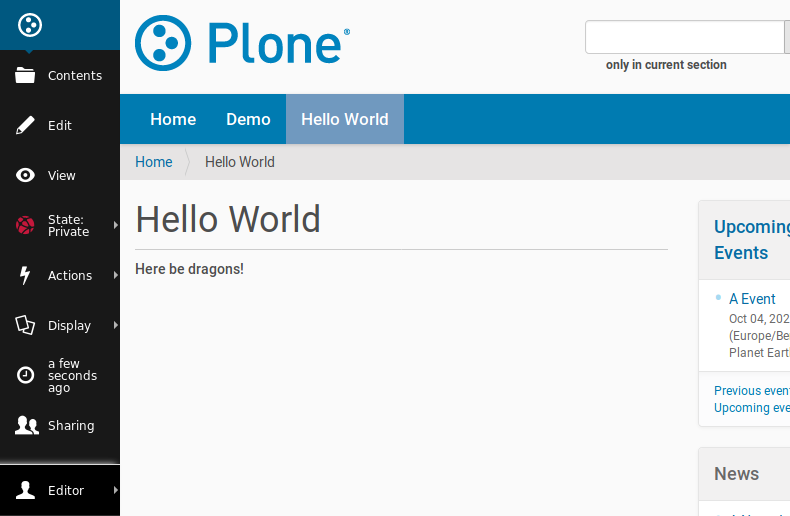

In [7]:
*** Settings ***

Library  String

*** Keywords ***

Create new page
    ${payload}=  Create dictionary
    ...  @type=Document
    ...  title=Hello World
    ...  text=<p>Here be dragons!</p>
    POST  /en  ${payload}
    Output
    Integer  response status  201
    ${url}=  Output  response body @id
    ${url}=  Strip string  ${url}  characters="
    [return]  ${url}

*** Test Cases **

Can view the new page
    ${url}=  Create new page
    Go to  ${url}
    Page should contain  Here be dragons!
    Set window size  800  600
    Capture page screenshot